In [52]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [53]:
df=pd.read_csv("perrin-freres-monthly-champagne-.csv")
df

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0
...,...,...
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN


In [54]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [55]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [56]:
df.isnull().sum()

Month                                                     1
Perrin Freres monthly champagne sales millions ?64-?72    2
dtype: int64

In [57]:
df.columns=['Month','Sales']
df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [58]:
df.drop(105,axis=0,inplace=True)
df.drop(106,axis=0,inplace=True)


In [59]:
df.tail()

,Month,Sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [60]:
df.isnull().sum()

Month    0
Sales    0
dtype: int64

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Month   105 non-null    object 
 1   Sales   105 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.5+ KB


In [62]:
df['Month']=pd.to_datetime(df['Month'])

In [63]:
df.head()

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [64]:
df.set_index('Month',inplace=True)

In [65]:
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [66]:
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


<Axes: xlabel='Month'>

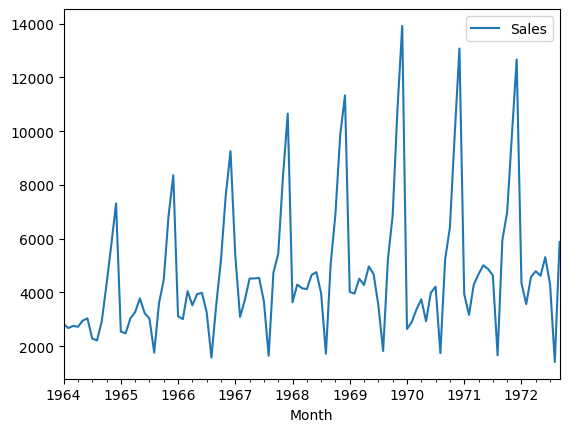

In [67]:
df.plot()

In [68]:
from statsmodels.tsa.stattools import adfuller

In [69]:
test_result= adfuller(df['Sales'])

In [70]:
def adfuller_test(sales):
    result = adfuller(sales)
    lables =['ADF Test statistic','p value','#Lags used','Number of observation Used']
    for value,lable in zip(result,lables):
        print(lable+':'+str(value))
    if result[1]<=0.05:
        print("storng evidence")
    else:
        print("week evidence")       

In [71]:
adfuller_test(df['Sales'])

ADF Test statistic:-1.8335930563276195
p value:0.3639157716602467
#Lags used:11
Number of observation Used:93
week evidence


In [72]:
df['Sales First Difference']=df['Sales']-df['Sales'].shift(1)

In [73]:
df['Sales'].shift(1)

Month
1964-01-01       NaN
1964-02-01    2815.0
1964-03-01    2672.0
1964-04-01    2755.0
1964-05-01    2721.0
               ...  
1972-05-01    4788.0
1972-06-01    4618.0
1972-07-01    5312.0
1972-08-01    4298.0
1972-09-01    1413.0
Name: Sales, Length: 105, dtype: float64

In [74]:
df

,Sales,Sales First Difference
Month,,
1964-01-01,2815.0,NaN
1964-02-01,2672.0,-143.0
1964-03-01,2755.0,83.0
1964-04-01,2721.0,-34.0
1964-05-01,2946.0,225.0
...,...,...
1972-05-01,4618.0,-170.0
1972-06-01,5312.0,694.0
1972-07-01,4298.0,-1014.0


In [75]:
df['Seasonal First Difference']=df['Sales']-df['Sales'].shift(12)

In [76]:
df.head(14)

,Sales,Sales First Difference,Seasonal First Difference
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
1964-06-01,3036.0,90.0,NaN
1964-07-01,2282.0,-754.0,NaN
1964-08-01,2212.0,-70.0,NaN
1964-09-01,2922.0,710.0,NaN


In [78]:
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test statistic:-7.626619157213166
p value:2.0605796968136632e-11
#Lags used:0
Number of observation Used:92
storng evidence


<Axes: xlabel='Month'>

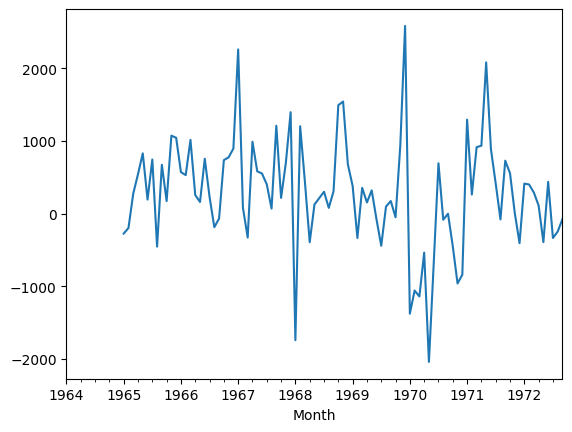

In [80]:
df['Seasonal First Difference'].plot()

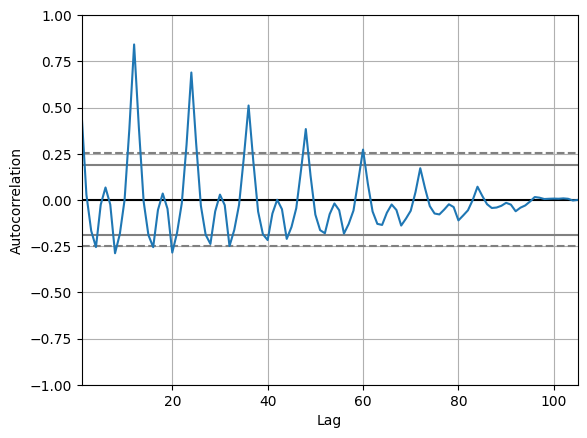

In [81]:
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt

autocorrelation_plot(df['Sales'])
plt.show()

In [83]:
from statsmodels.graphics.tsaplots import plot_acf ,plot_pacf
import  statsmodels.api as sm

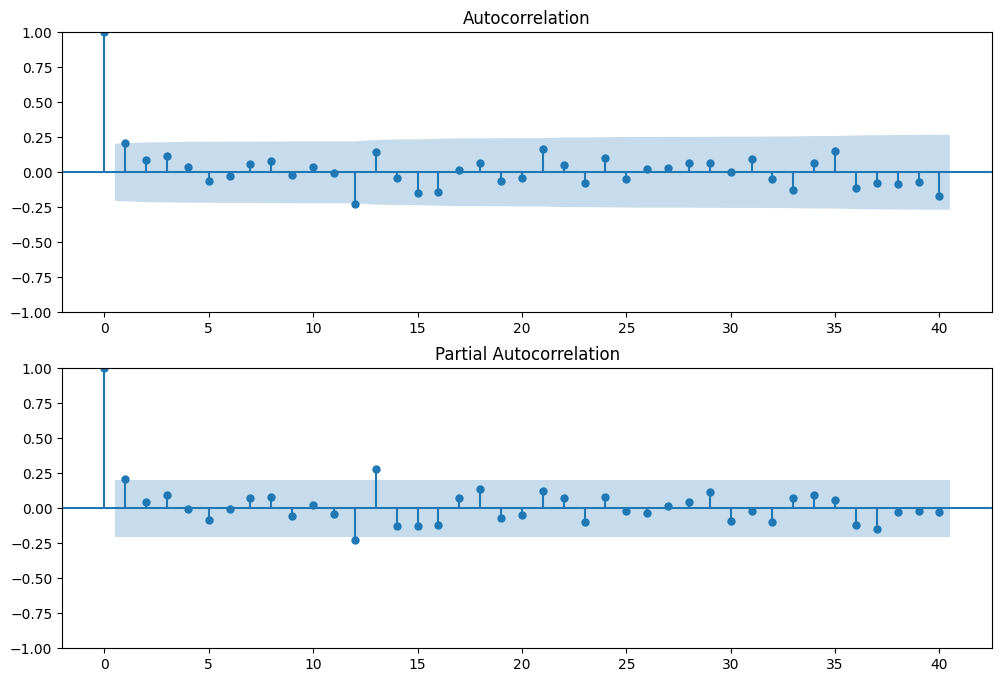

In [85]:
fig= plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)


In [88]:
from statsmodels.tsa.arima.model import ARIMA

In [89]:
model = ARIMA (df['Sales'],order=(1,1,1))
model_fit=model.fit()

d:\anaconda\envs\BIA\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [90]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  105
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -952.814
Date:                Sun, 06 Oct 2024   AIC                           1911.627
Time:                        15:54:27   BIC                           1919.560
Sample:                    01-01-1964   HQIC                          1914.841
                         - 09-01-1972                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4545      0.114      3.999      0.000       0.232       0.677
ma.L1         -0.9666      0.056    -17.316      0.000      -1.076      -0.857
sigma2      5.226e+06   6.17e+05      8.473      0.0

<Axes: xlabel='Month'>

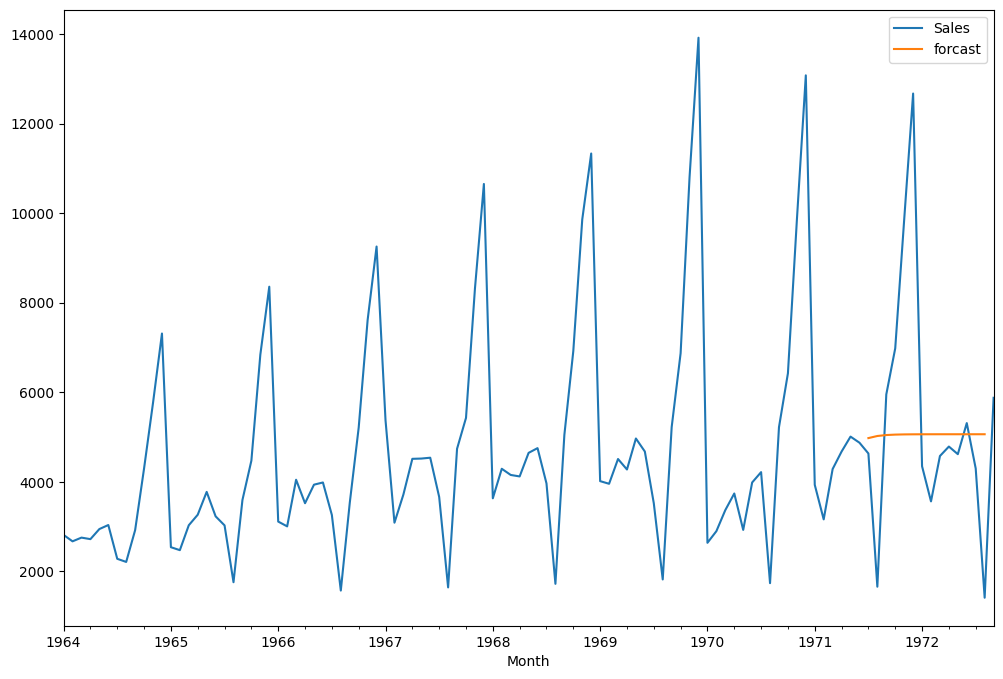

In [91]:
df['forcast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['Sales','forcast']].plot(figsize=(12,8))

In [92]:
import  statsmodels.api as sm

In [93]:
model=sm.tsa.statespace.SARIMAX(df['Sales'],order=(1,1,1),seasonal_order=(1,1,1,12))
result = model.fit()

d:\anaconda\envs\BIA\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<Axes: xlabel='Month'>

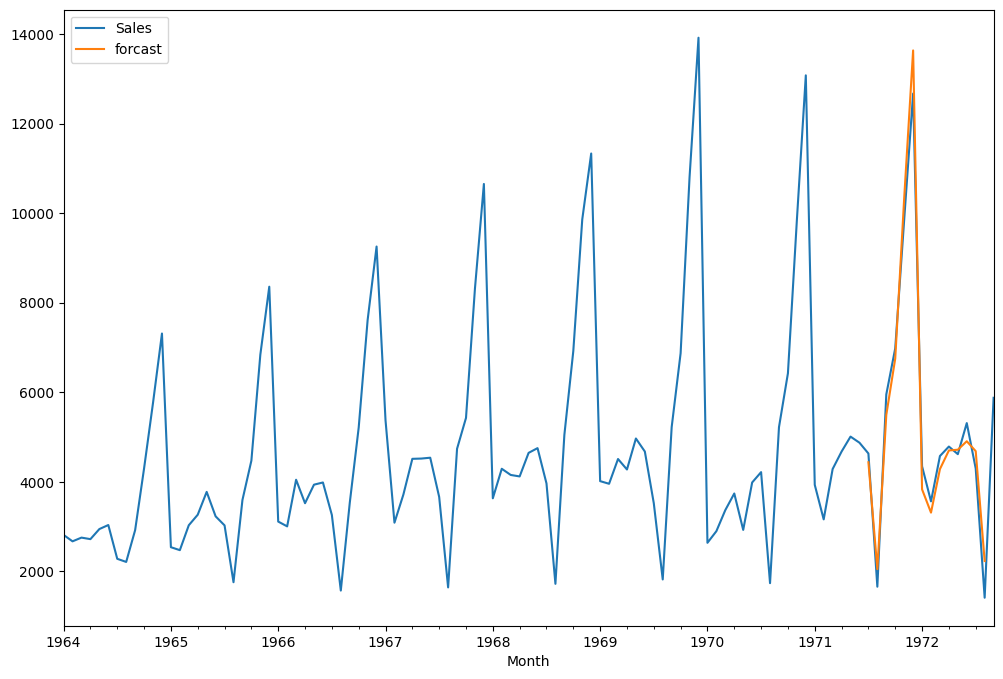

In [95]:
df['forcast']=result.predict(start=90,end=103,dynamic=True)
df[['Sales','forcast']].plot(figsize=(12,8))

In [97]:
df.tail()

,Sales,Sales First Difference,Seasonal First Difference,forcast
Month,,,,
1972-05-01,4618.0,-170.0,-392.0,4717.512505
1972-06-01,5312.0,694.0,438.0,4906.404893
1972-07-01,4298.0,-1014.0,-335.0,4685.438007
1972-08-01,1413.0,-2885.0,-246.0,2232.409299
1972-09-01,5877.0,4464.0,-74.0,NaN


In [98]:
from pandas.tseries.offsets import DateOffset
futur_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]
futur_dates

[Timestamp('1972-09-01 00:00:00'),
 Timestamp('1972-10-01 00:00:00'),
 Timestamp('1972-11-01 00:00:00'),
 Timestamp('1972-12-01 00:00:00'),
 Timestamp('1973-01-01 00:00:00'),
 Timestamp('1973-02-01 00:00:00'),
 Timestamp('1973-03-01 00:00:00'),
 Timestamp('1973-04-01 00:00:00'),
 Timestamp('1973-05-01 00:00:00'),
 Timestamp('1973-06-01 00:00:00'),
 Timestamp('1973-07-01 00:00:00'),
 Timestamp('1973-08-01 00:00:00'),
 Timestamp('1973-09-01 00:00:00'),
 Timestamp('1973-10-01 00:00:00'),
 Timestamp('1973-11-01 00:00:00'),
 Timestamp('1973-12-01 00:00:00'),
 Timestamp('1974-01-01 00:00:00'),
 Timestamp('1974-02-01 00:00:00'),
 Timestamp('1974-03-01 00:00:00'),
 Timestamp('1974-04-01 00:00:00'),
 Timestamp('1974-05-01 00:00:00'),
 Timestamp('1974-06-01 00:00:00'),
 Timestamp('1974-07-01 00:00:00'),
 Timestamp('1974-08-01 00:00:00')]

In [99]:
futur_dates_df= pd.DataFrame(index=futur_dates[1:],columns=df.columns)

In [101]:
futur_dates_df.tail()

,Sales,Sales First Difference,Seasonal First Difference,forcast
1974-04-01,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN,NaN


In [102]:
futur_df=pd.concat([df,futur_dates_df])

C:\Users\dell\AppData\Local\Temp\ipykernel_1264\2929880675.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  futur_df=pd.concat([df,futur_dates_df])


In [103]:
futur_df.tail()

,Sales,Sales First Difference,Seasonal First Difference,forcast
1974-04-01,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN,NaN


<Axes: >

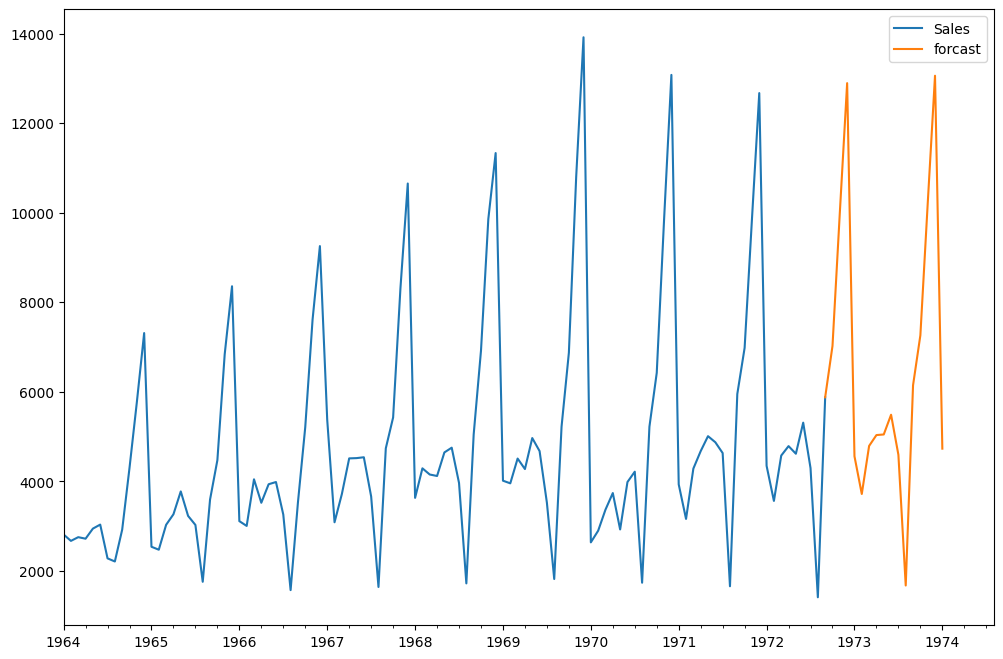

In [104]:
futur_df['forcast']=result.predict(start=104,end=120,dynamic=True)
futur_df[['Sales','forcast']].plot(figsize=(12,8))